In [59]:
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt 
from sklearn.decomposition import PCA
import seaborn as sns

## mnist dataset

In [61]:
path = './mnist.csv'
df_raw = pd.read_csv(path)
print(df_raw.isnull().sum())
df_raw_class = df_raw[['7']]
df_raw = df_raw.drop(columns=['7'])
df_raw.head(5)

#Check data and drop the first column which is class mark

7        0
0        0
0.1      0
0.2      0
0.3      0
        ..
0.663    0
0.664    0
0.665    0
0.666    0
0.667    0
Length: 785, dtype: int64


,0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,...,0.658,0.659,0.660,0.661,0.662,0.663,0.664,0.665,0.666,0.667
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [67]:
scaler = StandardScaler()
df = scaler.fit_transform(df_raw)

In [63]:
sse = []
k_range = range(1, 20)
for k in k_range:
    kmeans = KMeans(n_clusters=k)
    kmeans.fit(df)
    sse.append(kmeans.inertia_)

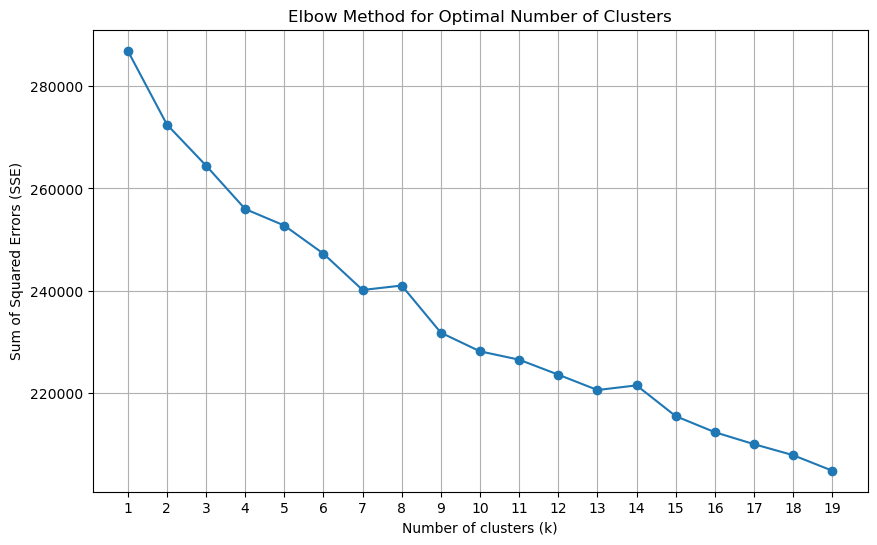

In [64]:
plt.figure(figsize=(10, 6))
plt.plot(k_range, sse, marker='o')
plt.xlabel('Number of clusters (k)')
plt.ylabel('Sum of Squared Errors (SSE)')
plt.title('Elbow Method for Optimal Number of Clusters')
plt.xticks(k_range)
plt.grid(True)
plt.show()

#it is difficult to determine the optimal number of clusters based on this plot

In [68]:
pca = PCA(n_components=2)
principal_components = pca.fit_transform(df)

principal_df = pd.DataFrame(data=principal_components, columns=['Principal Component 1', 'Principal Component 2'])
principal_df

,Principal Component 1,Principal Component 2
0,4.851275,-12.344618
1,-7.016792,-5.613622
2,8.542381,-0.406741
3,1.165440,6.612979
4,-7.669348,-5.343524
...,...,...
494,8.614315,-2.383023
495,-3.274254,7.274726
496,-6.226463,0.340208
497,0.356621,-0.366213


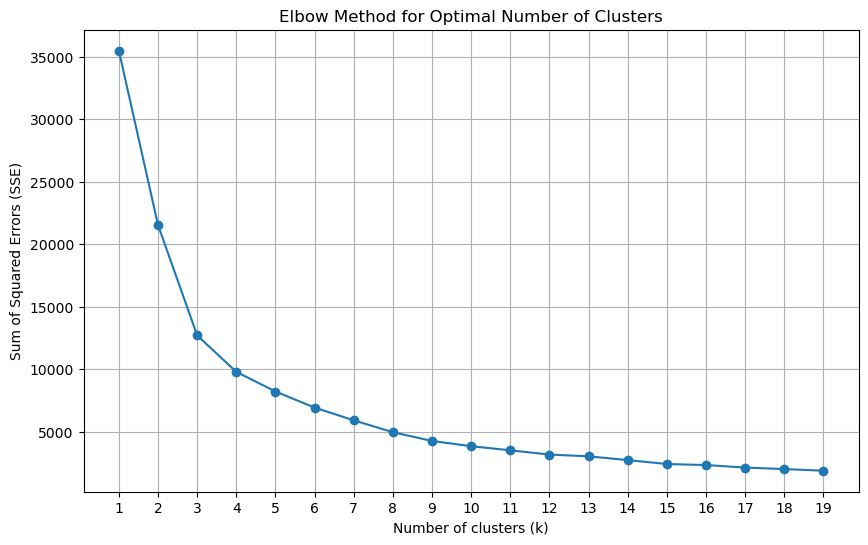

In [69]:
sse = []
k_range = range(1, 20)
for k in k_range:
    kmeans = KMeans(n_clusters=k)
    kmeans.fit(principal_df)
    sse.append(kmeans.inertia_)

plt.figure(figsize=(10, 6))
plt.plot(k_range, sse, marker='o')
plt.xlabel('Number of clusters (k)')
plt.ylabel('Sum of Squared Errors (SSE)')
plt.title('Elbow Method for Optimal Number of Clusters')
plt.xticks(k_range)
plt.grid(True)
plt.show()

# From my perspective the optimal number of clusters is 6


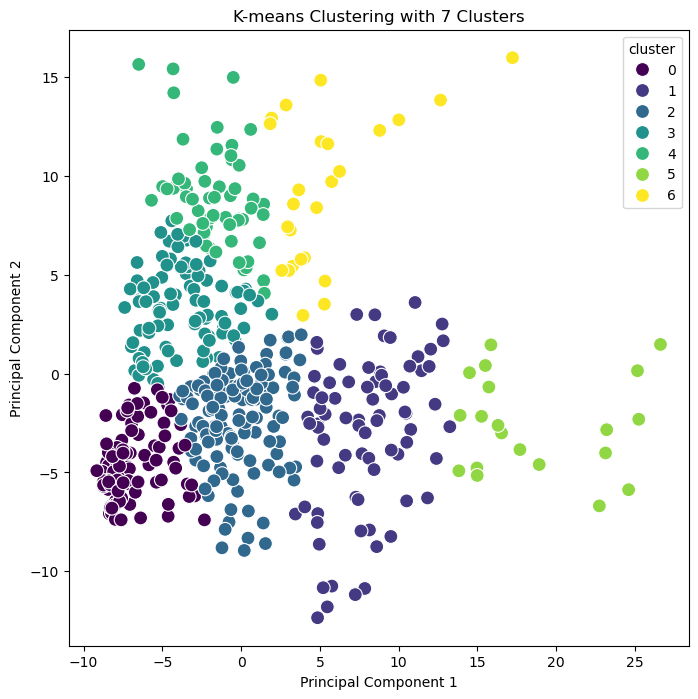

In [94]:
optimal_k = 7
kmeans = KMeans(n_clusters=optimal_k)
kmeans.fit(principal_df)
principal_df['cluster'] = kmeans.labels_

plt.figure(figsize=(8, 8))
sns.scatterplot(data=principal_df, x='Principal Component 1', y='Principal Component 2', hue='cluster', palette='viridis', s=100)
plt.title(f'K-means Clustering with {optimal_k} Clusters')
plt.show()


## data_2d dataset

In [84]:
path_2 = './data_2d.csv'
df_raw_2 = pd.read_csv(path_2) 
df_raw_2.columns = ['Cluster', 'Feature 1', 'Feature 2']
df_raw_2

,Cluster,Feature 1,Feature 2
0,0.0,2.687848,2.366961
1,0.0,-0.201379,0.470430
2,0.0,0.608496,1.225400
3,0.0,-0.082282,1.137218
4,0.0,2.083069,2.694482
...,...,...,...
194,1.0,0.629144,4.378584
195,1.0,-0.723824,5.361801
196,1.0,1.346107,2.333476
197,1.0,3.608219,3.411546


In [85]:
df_2 = df_raw_2.drop(columns=['Cluster'])
df_2.head(5)

,Feature 1,Feature 2
0,2.687848,2.366961
1,-0.201379,0.470430
2,0.608496,1.225400
3,-0.082282,1.137218
4,2.083069,2.694482


In [87]:
sse_2 = []
k_range = range(1, 20)

for k in k_range:
    kmeans_2 = KMeans(n_clusters=k)
    kmeans_2.fit(df_2)
    sse_2.append(kmeans_2.inertia_)

print(sse_2)  # print SSE list after the loop completes


[809.2157980450891, 345.76431862173735, 262.91838744406834, 203.2031373109653, 168.82253539238792, 130.63111292723838, 117.85803649385616, 103.39039461324184, 95.63800916534683, 85.94847796463213, 79.15745650004342, 74.27861546821187, 63.842419448653416, 60.30055294645967, 56.872443285973354, 51.58501465817465, 48.08145623380442, 46.29907998407294, 42.042521757298694]


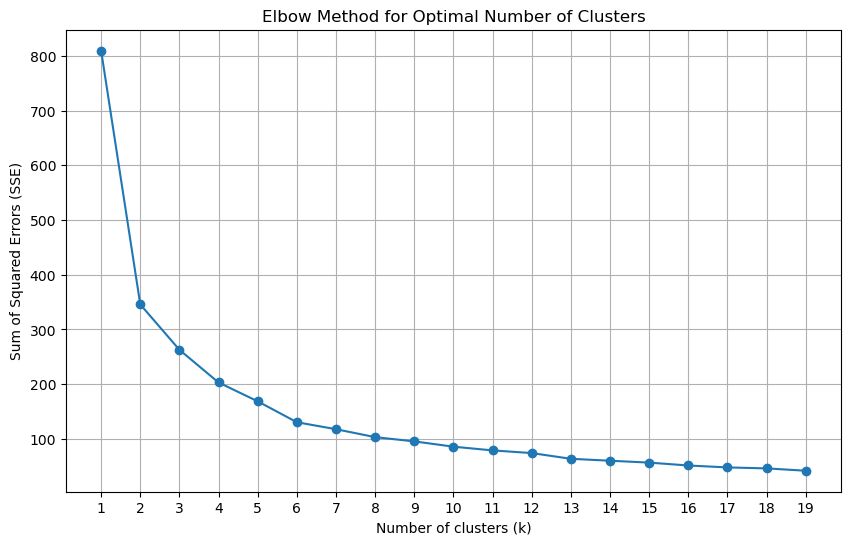

In [89]:
plt.figure(figsize=(10, 6))
plt.plot(k_range, sse_2, marker='o')
plt.xlabel('Number of clusters (k)')
plt.ylabel('Sum of Squared Errors (SSE)')
plt.title('Elbow Method for Optimal Number of Clusters')
plt.xticks(k_range)
plt.grid(True)
plt.show()

# From my perspective the optimal number of clusters is 7

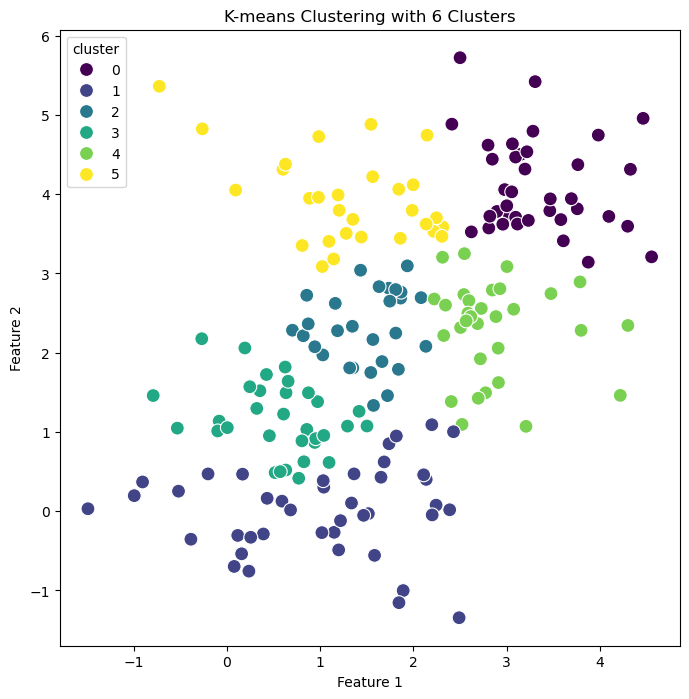

In [93]:
optimal_k = 6
kmeans = KMeans(n_clusters=optimal_k)
kmeans.fit(df_2)
df_2['cluster'] = kmeans.labels_

plt.figure(figsize=(8, 8))
sns.scatterplot(data=df_2, x='Feature 1', y='Feature 2', hue='cluster', palette='viridis', s=100)
plt.title(f'K-means Clustering with {optimal_k} Clusters')
plt.show()
